In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('Hotel_Reviews.csv')
df = pd.read_csv('Hotel_review_feature_engineering.csv')

In [3]:
df.head(2)

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,wi_fi,air_conditioning,breakfast,booking_com,room_problem,location,staff,bed_and_room,month,year
0,0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,2017
1,1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,2017


In [4]:
# replace 'No Negative' or 'No Positive' with space
df["Positive_Review"] = df["Positive_Review"].apply(lambda x: x.replace("No Positive", ""))
df["Negative_Review"] = df["Negative_Review"].apply(lambda x: x.replace("No Negative", ""))

In [5]:
df.head(2)

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,wi_fi,air_conditioning,breakfast,booking_com,room_problem,location,staff,bed_and_room,month,year
0,0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,2017
1,1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,2017


#### Prediction of the review score with supervised learning

In [6]:
# Round up reviewer scores in a new column
df["Reviewer_Score_Round"] = df["Reviewer_Score"].apply(lambda x: int(round(x)))

In [7]:
df.head(2)

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,air_conditioning,breakfast,booking_com,room_problem,location,staff,bed_and_room,month,year,Reviewer_Score_Round
0,0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8,2017,3
1,1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,2017,8


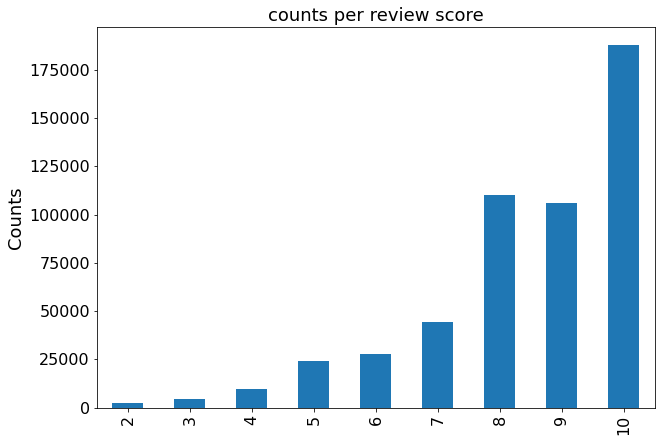

In [8]:
# counts per review score
reviews_dist = df["Reviewer_Score_Round"].value_counts().sort_index()
bar = reviews_dist.plot.bar(figsize =(10,7))
plt.title("counts per review score", fontsize = 18)
plt.ylabel("Counts", fontsize = 18)
bar.tick_params(labelsize=16)

# drop the column "Reviewer_Score_Round" column
df.drop("Reviewer_Score_Round", axis = 1, inplace = True)

In [9]:
# Convert the reviews to lower and delete leading/trailing space
df["Negative_Review"] = df["Negative_Review"].str.lower().str.strip()
df["Positive_Review"] = df["Positive_Review"].str.lower().str.strip()

Let's analyze each review to get it's level of positivity or negativity using sentiment analyzer. Here's an example of how sentiment analyzer works:

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

rev1 = "The hotel lobby was excellent, I absolutely enjoyed my stay!"
rev2 = "The hotel staff were rude, I had a terrible experience"
rev3 = "It was ok"

print(f"review 1:\n{rev1}\nScore: {sent_analyzer.polarity_scores(rev1)}")

print(f"\nreview 2:\n{rev2}\nScore: {sent_analyzer.polarity_scores(rev2)}")

print(f"\nreview 3:\n{rev3}\nScore: {sent_analyzer.polarity_scores(rev3)}")

review 1:
The hotel lobby was excellent, I absolutely enjoyed my stay!
Score: {'neg': 0.0, 'neu': 0.409, 'pos': 0.591, 'compound': 0.8264}

review 2:
The hotel staff were rude, I had a terrible experience
Score: {'neg': 0.504, 'neu': 0.496, 'pos': 0.0, 'compound': -0.7269}

review 3:
It was ok
Score: {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.296}


The compound is the general positivity of a text. If the compound score is above 0, the text is positive, otherwise, it is negative.

We will now create 2 additional columns. One for the compound polarity scores of the positive reviews and the other for the negative reviews compound polarity scores. To ensure accuracy, the polarity_score will be only >= 0 for the positive reviews and <= 0 for the negative reviews.

In [11]:
pos = df["Positive_Review"].apply(lambda x: (sent_analyzer.polarity_scores(x)["compound"]))
neg = df["Negative_Review"].apply(lambda x: (sent_analyzer.polarity_scores(x)["compound"]))

df["sentiment_score"] = pos + neg
df["polarity_pos"] = pos
df["polarity_neg"] = neg

In [12]:
df.head()

,Unnamed: 0,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,...,booking_com,room_problem,location,staff,bed_and_room,month,year,sentiment_score,polarity_pos,polarity_neg
0,0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,i am so angry that i made this post available ...,397,1403,...,1.0,0.0,0.0,0.0,0.0,8,2017,-0.3424,0.5994,-0.9418
1,1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,,0,1403,...,0.0,0.0,1.0,0.0,0.0,8,2017,0.9494,0.9494,0.0000
2,2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,rooms are nice but for elderly a bit difficult...,42,1403,...,0.0,0.0,1.0,0.0,0.0,7,2017,0.1251,0.8720,-0.7469
3,3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,UK,my room was dirty and i was afraid to walk bar...,210,1403,...,0.0,0.0,1.0,0.0,0.0,7,2017,0.2079,0.9260,-0.7181
4,4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,you when i booked with your company on line yo...,140,1403,...,0.0,0.0,0.0,0.0,0.0,7,2017,0.2807,0.7579,-0.4772


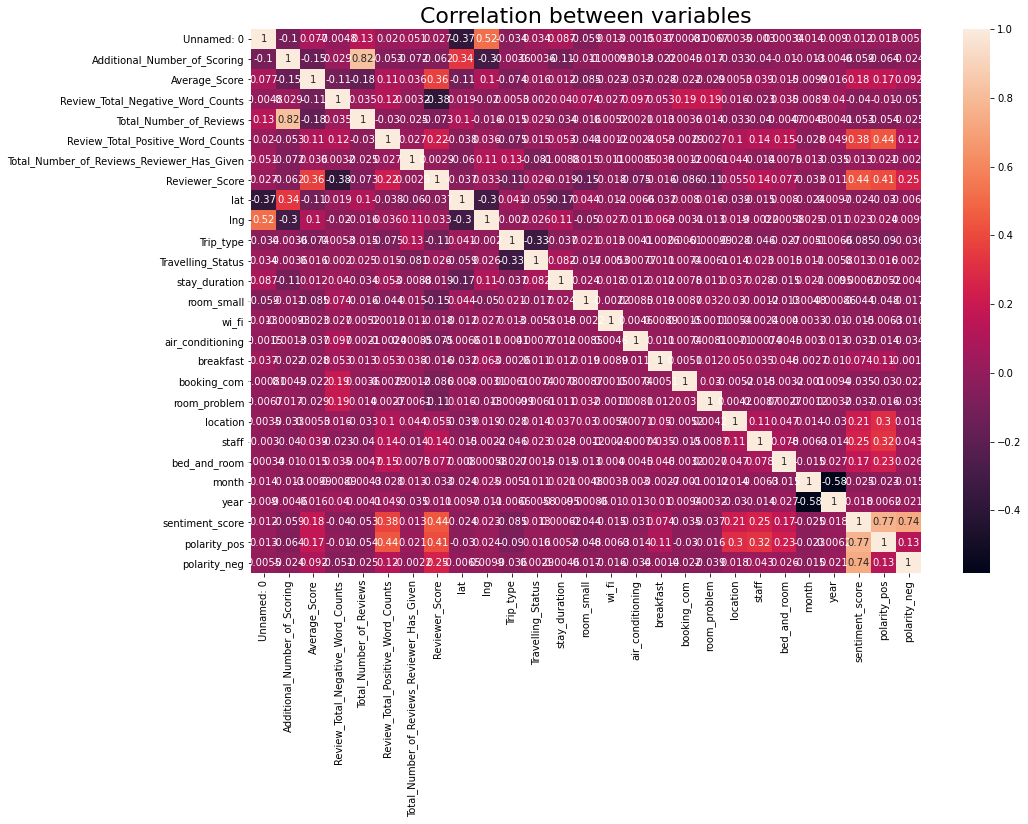

In [13]:
#correlation between variables
df_corr = df.corr()
#df_corr.index
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot = True)
plt.title("Correlation between variables", fontsize = 22)
plt.show()

We want to take "Reviewer_Score" as our target variable. so lets look at correlation of all other variables with reviewer score

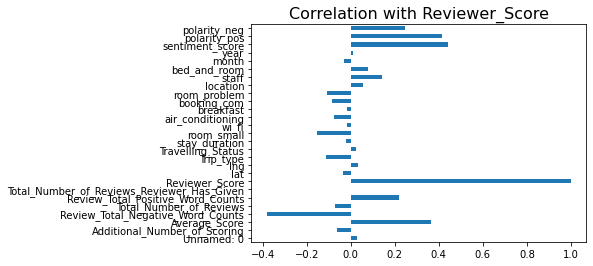

In [14]:
df_corr["Reviewer_Score"].plot.barh()
plt.title("Correlation with Reviewer_Score", fontsize = 16)
plt.show()

The direction of the correlation is not important, so we'll take the absolute values of the correlation coefficients

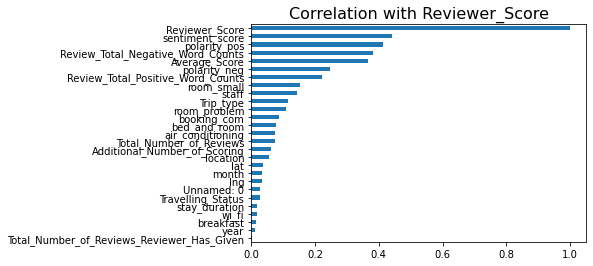

In [16]:
corr = df.corr()

corr["Reviewer_Score"].apply(lambda x: abs(x)).sort_values().plot.barh()
plt.title("Correlation with Reviewer_Score", fontsize = 16)
plt.show()

To train our model, we'l take columns with high correlations with reviewer score

In [17]:
columnss = ['Average_Score',
       'Review_Total_Negative_Word_Counts',
       'Review_Total_Positive_Word_Counts',
       'sentiment_score', 'polarity_pos', 'polarity_neg']

In [18]:
X = df[columnss]
y = df['Reviewer_Score']

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [20]:
# scaling with StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
msre = mean_squared_error(y_test,pred)
msre

1.5788599652805306

In [23]:
# GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
msre = mean_squared_error(y_test,pred)
msre

1.3594734468181786

In [24]:
# RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
msre = mean_squared_error(y_test,pred)
msre

1.4860861292786298